# 데이터로드 및 모듈import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline

['NanumGothic']


In [3]:
df = pd.read_csv("../nationalhealth_2010to2021.csv")
m_data = pd.read_excel("../pandapear/data/meta_data20.xlsx")
df_20 = pd.read_csv("../national_only20_health_2010to2021.csv")

def trans(val): #변수 번역 input str
        return m_data["variable description"][m_data["variable"] == val].values[0]

def disc(val): #설문 내역
        return m_data["option description"][m_data["variable"] == val].values[0]
        
def change2None(data): #통계량을 측정할 때, 결측값 복원
    dataN = data.copy()
    for i in data.columns:
        dataN.replace({i:{-1:None}},inplace=True)
        dataN.replace({i:{-2:None}},inplace=True)
    return dataN


#타겟 + 피쳐 str list
col_li = df.columns.to_list() 
#타겟 str list
target_li = df.columns[-13:].to_list()
#피쳐 str list
fea_li = df.columns[:-13].to_list()

#범주형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "category"].values)
cat_li = [i for i in temp if i in col_li] #범주형 자료 컬럼 : cat_li
#연속형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "numeric"].values)
expcept = ['ID', 'ID_fam', 'LW_mt_a1', 'age', 'year']
num_li = [i for i in temp if i in col_li] #연속형 자료 컬럼 : num_li

# 변수 타입별 column리스트 5가지 선언
- 이진형
- 범주형
- 연속형
- 질병변수
- Target

In [4]:
#타겟 + 피쳐 str list
col_li = df.columns.to_list() 
#타겟 str list
target_li = df.columns[-13:].to_list()
#피쳐 str list
fea_li = df.columns[:-13].to_list()

#범주형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "category"].values)
cat_li = [i for i in temp if i in col_li] #범주형 자료 컬럼 : cat_li
#연속형 자료 str list
temp = list(m_data["variable"][m_data['data type']== "numeric"].values)
expcept = ['ID', 'ID_fam', 'LW_mt_a1', 'age', 'year']
num_li = [i for i in temp if i in col_li] #연속형 자료 컬럼 : num_li
bin_col = [i for i in col_li if len(df[i].unique()) < 4]

In [5]:
df_20to80 = pd.concat([df,df_20], ignore_index=True)
df_40 = df_20to80[(df_20to80['age'] >= 40)&(df_20to80['age'] < 50)]

cat_li = list(set(cat_li) - set(bin_col))
df_20to80 = df_20to80[cat_li +num_li + bin_col]

In [6]:
print('이진형 : ',bin_col)

이진형 :  ['town_t', 'sex', 'allownc', 'marri_1', 'EC1_1', 'dr_month', 'mh_stress', 'HE_HPdr', 'HE_DMdr', 'HE_mens', 'HE_prg', 'HE_HPfh1', 'HE_HPfh2', 'HE_HLfh1', 'HE_HLfh2', 'HE_IHDfh1', 'HE_IHDfh2', 'HE_STRfh1', 'HE_STRfh2', 'HE_DMfh1', 'HE_DMfh2', 'HE_rPLS', 'HE_hepaB', 'HE_Unitr', '비만', '고혈압', '당뇨병', '고콜레스테롤혈증', '고중성지방혈증', 'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식', '아토피피부염', '골관절염', '우울증']


In [7]:
print('범주형 : ',cat_li)
#범주형에서 이진형 빼주기

범주형 :  ['BE3_31', 'EC_pedu_2', 'BS3_1', 'region', 'LW_mt', 'HE_Uro', 'BD1_11', 'HE_HPfh3', 'marri_2', 'HE_STRfh3', 'incm5', 'incm', 'fam_rela', 'genertn', 'BE5_1', 'cfam', 'EC_wht_5', 'HE_Ubil', 'tins', 'HE_HLfh3', 'ho_incm5', 'HE_DMfh3', 'HE_Uket', 'EC_pedu_1', 'edu', 'HE_Ubld', 'ho_incm', 'BP6_10', 'HE_Uglu', 'educ', 'LW_br', 'BD2_1', 'BP7', 'D_1_1', 'HE_IHDfh3', 'occp', 'BD2_31', 'HE_Upro']


In [8]:
print('연속형 : ',num_li)

연속형 :  ['EC_wht_23', 'HE_fst', 'HE_sbp', 'HE_dbp', 'HE_ht', 'HE_wt', 'HE_wc', 'HE_BMI', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_HDL_st2', 'HE_TG', 'HE_ast', 'HE_alt', 'HE_HB', 'HE_HCT', 'HE_BUN', 'HE_crea', 'HE_WBC', 'HE_RBC', 'HE_Bplt', 'HE_Uph', 'HE_Usg', 'HE_Ucrea', 'N_INTK', 'N_EN', 'N_WATER', 'N_PROT', 'N_FAT', 'N_CHO', 'N_CA', 'N_PHOS', 'N_FE', 'N_NA', 'N_K', 'N_CAROT', 'N_RETIN', 'N_B1', 'N_B2', 'N_NIAC', 'N_VITC']


In [9]:
print('Target : ', target_li)

Target :  ['비만', '고혈압', '당뇨병', '고콜레스테롤혈증', '고중성지방혈증', 'B형간염', '빈혈', '뇌졸중', '협심증또는심근경색증', '천식', '아토피피부염', '골관절염', '우울증']


# Why insurance

In [10]:
for i in target_li :
    df_40[i] = np.where(df_40[i] == 1, 1, 0)

df_40['existence'] = np.where(df_40[target_li].sum(axis=1) > 0, 1, 0)
rate = round(sum(df_40['existence'])/len(df_40)*100, 1)
print('40세에서 13종류의 만성질환 합집합 비율은 : {}% 입니다.'.format(rate))

40세에서 13종류의 만성질환 합집합 비율은 : 63.7% 입니다.


# Feature reliance

## 4개 Target의 합집합으로 구성한 disease column
- 타겟 변수 간 metric : 자카드 유사도

- 0                   kor  unique
- educ       0.089029              교육수준: 학력       8
- BD2_31     0.066604        (만12세이상) 폭음 빈도       7
- region     0.041658                17개 시도      17
- EC_pedu_2  0.037758  (성인) 유년기환경: 어머니 교육수준      10
- D_1_1      0.032334              주관적 건강인지       6
- HE_Uglu    0.028457                    요당       6
- EC_wht_5   0.019248                변형근로시간      10
- marri_2    0.017047                  결혼상태       7
- fam_rela   0.015490              가구주와의 관계      11
- HE_STRfh3  0.006165     뇌졸중 의사진단 여부(형제자매)       4

In [11]:
#타겟 변수 간 자카드 유사도 검정
dfN = change2None(df)

def score(col1, col2, df = df):
    intersection = (df[col1]==1) & (df[col2]==1)
    union_1 = (df[col1]==1) & (df[col2]==0)
    union_2 = (df[col1]==0) & (df[col2]==1)
    union_3 = (df[col1]==1) & (df[col2]==1)
    #print(sum(intersection) + (sum(union_1)+sum(union_2)+sum(union_3)))
    
    return sum(intersection) / (sum(union_1)+sum(union_2)+sum(union_3))


target = ["고혈압","당뇨병","B형간염","협심증또는심근경색증","뇌졸중"]

temp = [[score(i,target[j],dfN) for j in range(5)] for i in target]
temp
score = pd.DataFrame(temp, index = target, columns=target)

score

,고혈압,당뇨병,B형간염,협심증또는심근경색증,뇌졸중
고혈압,1.000000,0.247195,0.027806,0.072963,0.065834
당뇨병,0.247195,1.000000,0.025783,0.091290,0.071483
B형간염,0.027806,0.025783,1.000000,0.014412,0.012910
협심증또는심근경색증,0.072963,0.091290,0.014412,1.000000,0.062090
뇌졸중,0.065834,0.071483,0.012910,0.062090,1.000000


In [12]:
#Target on Project
cnt = 0
df_20to80["Target"] = [0 for i in range(len(df_20to80))]
for i in range(len(df_20to80)):
    if df_20to80['고혈압'][i] == 1.0 or df_20to80['B형간염'][i] or df_20to80['당뇨병'][i] == 1.0 or df_20to80['협심증또는심근경색증'][i] == 1.0 or df_20to80['뇌졸중'][i]:
        df_20to80["Target"][i] = 1.0
df_20to80["Target"].value_counts()

C:\Users\jihoo\AppData\Local\Temp\ipykernel_6580\1121114721.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20to80["Target"][i] = 1.0


1    21080
0    18350
Name: Target, dtype: int64

In [13]:
#Feature Importance Module
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def rf_fe_importance(data, target_name, data_type, num):
    '''
    랜덤포레스트로 변수중요도 구하기
        target_name : 변수이름
        num : 상위n개 변수 뽑기
    '''
    if data_type == "binary":
        features = data.loc[:, bin_col].columns.drop(target_li)
    elif data_type == "cataegory":
        features = data.loc[:, cat_li].columns
    elif data_type == "numeric":
        features = data.loc[:, num_li].columns
    elif data_type == "all": 
        features = data.loc[:, num_li+cat_li+bin_col].columns
    
    X = data[features]
    y = data[target_name]

    X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,test_size=0.1, random_state=42)

    model = RandomForestClassifier(n_estimators=5, random_state=0, max_depth = 15)
    model.fit(X_train, y_train)

    predict = model.predict(X_test)
    print("tain set accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
    print("test set accuracy: ", metrics.accuracy_score(y_test, model.predict(X_test)))
    df = pd.DataFrame(model.feature_importances_, index =features)[:num].sort_values(0, ascending=False)
    return df

In [14]:
FI_b = rf_fe_importance(df_20to80,"Target","binary",10)
arr = [trans(i) for i in list(FI_b.index)] ; FI_b["kor"] = arr
arr2 = [len(df_20to80[i].unique()) for i in list(FI_b.index)] ; FI_b["unique"] = arr2
print("\n")
FI_n = rf_fe_importance(df_20to80,"Target","numeric",10)
arr = [trans(i) for i in list(FI_n.index)] ; FI_n["kor"] = arr
arr2 = [len(df_20to80[i].unique()) for i in list(FI_n.index)] ; FI_n["unique"] = arr2
print("\n")
FI_c = rf_fe_importance(df_20to80,"Target","cataegory",10)
arr = [trans(i) for i in list(FI_c.index)] ; FI_c["kor"] = arr
arr2 = [len(df_20to80[i].unique()) for i in list(FI_c.index)] ; FI_c["unique"] = arr2

tain set accuracy:  0.7045396905909206
test set accuracy:  0.6905909206188181


tain set accuracy:  0.9265364781469271
test set accuracy:  0.7839208724321582


tain set accuracy:  0.8564826556203681
test set accuracy:  0.7453715445092569


In [15]:
print("binary")
print(FI_b)
print("\n")
print("numeric")
print(FI_n)
print("\n")
print("cataegory")
print("\n")
print(FI_c)
print("\n")

binary
                  0               kor  unique
HE_HPdr    0.172091  검진당일 고혈압 약 복용 여부       3
marri_1    0.141952              결혼여부       3
HE_DMdr    0.108331  검진당일 당뇨병 약 복용 여부       3
EC1_1      0.046241           경제활동 상태       2
HE_mens    0.032885              생리여부       3
dr_month   0.032359             월간음주율       2
town_t     0.027064           동/읍면 구분       2
sex        0.022406                성별       2
mh_stress  0.020309          스트레스 인지율       2
allownc    0.017967         기초생활수급 여부       3


numeric
                  0                 kor  unique
HE_sbp     0.161190  최종 수축기 혈압(2,3차 평균)     237
HE_HbA1c   0.142146               당화혈색소     110
HE_dbp     0.063906  최종 이완기 혈압(2,3차 평균)     167
HE_glu     0.036169                공복혈당     272
HE_wc      0.024127                허리둘레     672
HE_ht      0.019919                  신장     622
HE_BMI     0.018663               체질량지수   32639
EC_wht_23  0.014835          주당 평균 근로시간     124
HE_wt      0.012269                  체중     8

## 이진형, 범주형 column에 대한 상관 분석 시행


- BD1_11     0.056553       (만12세이상) 1년간 음주빈도       7
- BD2_1      0.036119   (만12세이상) 한 번에 마시는 음주량       7
- BS3_1      0.022957  (성인) 현재 일반담배(궐련) 흡연 여부       5
- BP7        0.022170             1년간 정신문제 상담       4
- incm5      0.019225             소득 5분위수(개인)       5
- HE_Ubld    0.016473                     요잠혈       6
- LW_br      0.014483              모유수유 경험 여부       4
- HE_DMfh3   0.011815       당뇨병 의사진단 여부(형제자매)       4
- HE_HLfh3   0.006513      고지혈증 의사진단 여부(형제자매)       4
- HE_IHDfh3  0.005887   허혈성심장질환 의사진단 여부(형제자매)       4

In [16]:
##상관계수 데이터프레임 만들기 
def do_corr_analysis(data,columns:list) :


    corr = data[columns].corr()
    corr = pd.melt(corr.reset_index(), id_vars='index')
    
    if columns == bin_col :
        corr = corr[(corr['value'] > 0.4)|(corr['value'] < -0.4)]
    else :
        corr = corr[((corr['value'] > 0.4)&(corr['value'] < 0.99))|((corr['value'] < -0.4)&(corr['value'] > -0.99))]
    
    ##ind2int
    ind_dic = {}
    for ii, ind in enumerate(set(corr['index'])):
        ind_dic[ind] = ii
    ind_dic

    corr['index2values'] = corr['index'].map(ind_dic)
    corr['variable2values'] = corr['variable'].map(ind_dic)

    ##시각화
    fig = plt.figure(figsize=(50,50))

    x = corr['index2values'].values
    y = corr['variable2values'].values
    size = corr['value'].values*1000
    plt.scatter(x, y, # y
               alpha=0.7, 
               s=size*8, # marker size
               c=size*8, # marker color
               cmap='viridis')
    plt.style.use("dark_background")
    plt.title('범주형변수-bin_li 상관관계', fontsize=10)
    plt.xticks(np.arange(len(set(x))),ind_dic.keys())
    plt.yticks(np.arange(len(set(x))),ind_dic.keys())
    plt.colorbar()
    plt.show()


    ##번역된 변수 칼럼 만들기 
    trans_index_li = []
    for ii in corr['index'].values:
        try :
            translate_in = trans(ii)
            trans_index_li.append(translate_in)
        except :
            trans_index_li.append(ii)

    trans_variable_li = []
    for jj in corr['variable'].values:
        try :
            translate_va = trans(jj)
            trans_variable_li.append(translate_va)
        except :
            trans_variable_li.append(jj)

    corr['index_trans'] = trans_index_li
    corr['variable_trans'] = trans_variable_li

    corr = corr[['index','variable', 'index_trans', 'variable_trans', 'index2values', 'variable2values', 'value']]
    corr = corr.sort_values(by=['value'], ascending=False)
    corr.reset_index(drop=True, inplace=True)

    ## (index, variable) (vairable, index)중복된 값들 제거
    corr[['index', 'variable']].values


    dic_indva = {}
    indva = []
    for ii, (ind, va) in enumerate(corr[['index', 'variable']].values):
        if ii == 0:
            indva.append((ind,va))
            dic_indva[ii] = (ind, va)
        else :
            if (va,ind) in indva :
                pass 
            else :
                indva.append((ind,va))
                dic_indva[ii] = (ind,va)

    corr = corr.iloc[list(dic_indva.keys())]
    corr.reset_index(drop=True, inplace=True)
    return corr

### 이진형에 대한 상관분석 시행

In [17]:
df1 = change2None(df_20to80[bin_col])
df1 = df1.fillna(0)
df1

,town_t,sex,allownc,marri_1,EC1_1,dr_month,mh_stress,HE_HPdr,HE_DMdr,HE_mens,...,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,1.0,1.0,20.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,20.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,20.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,1.0,20.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,2.0,20.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39425,1.0,2.0,20.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39426,1.0,1.0,10.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39427,1.0,2.0,10.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39428,2.0,2.0,20.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


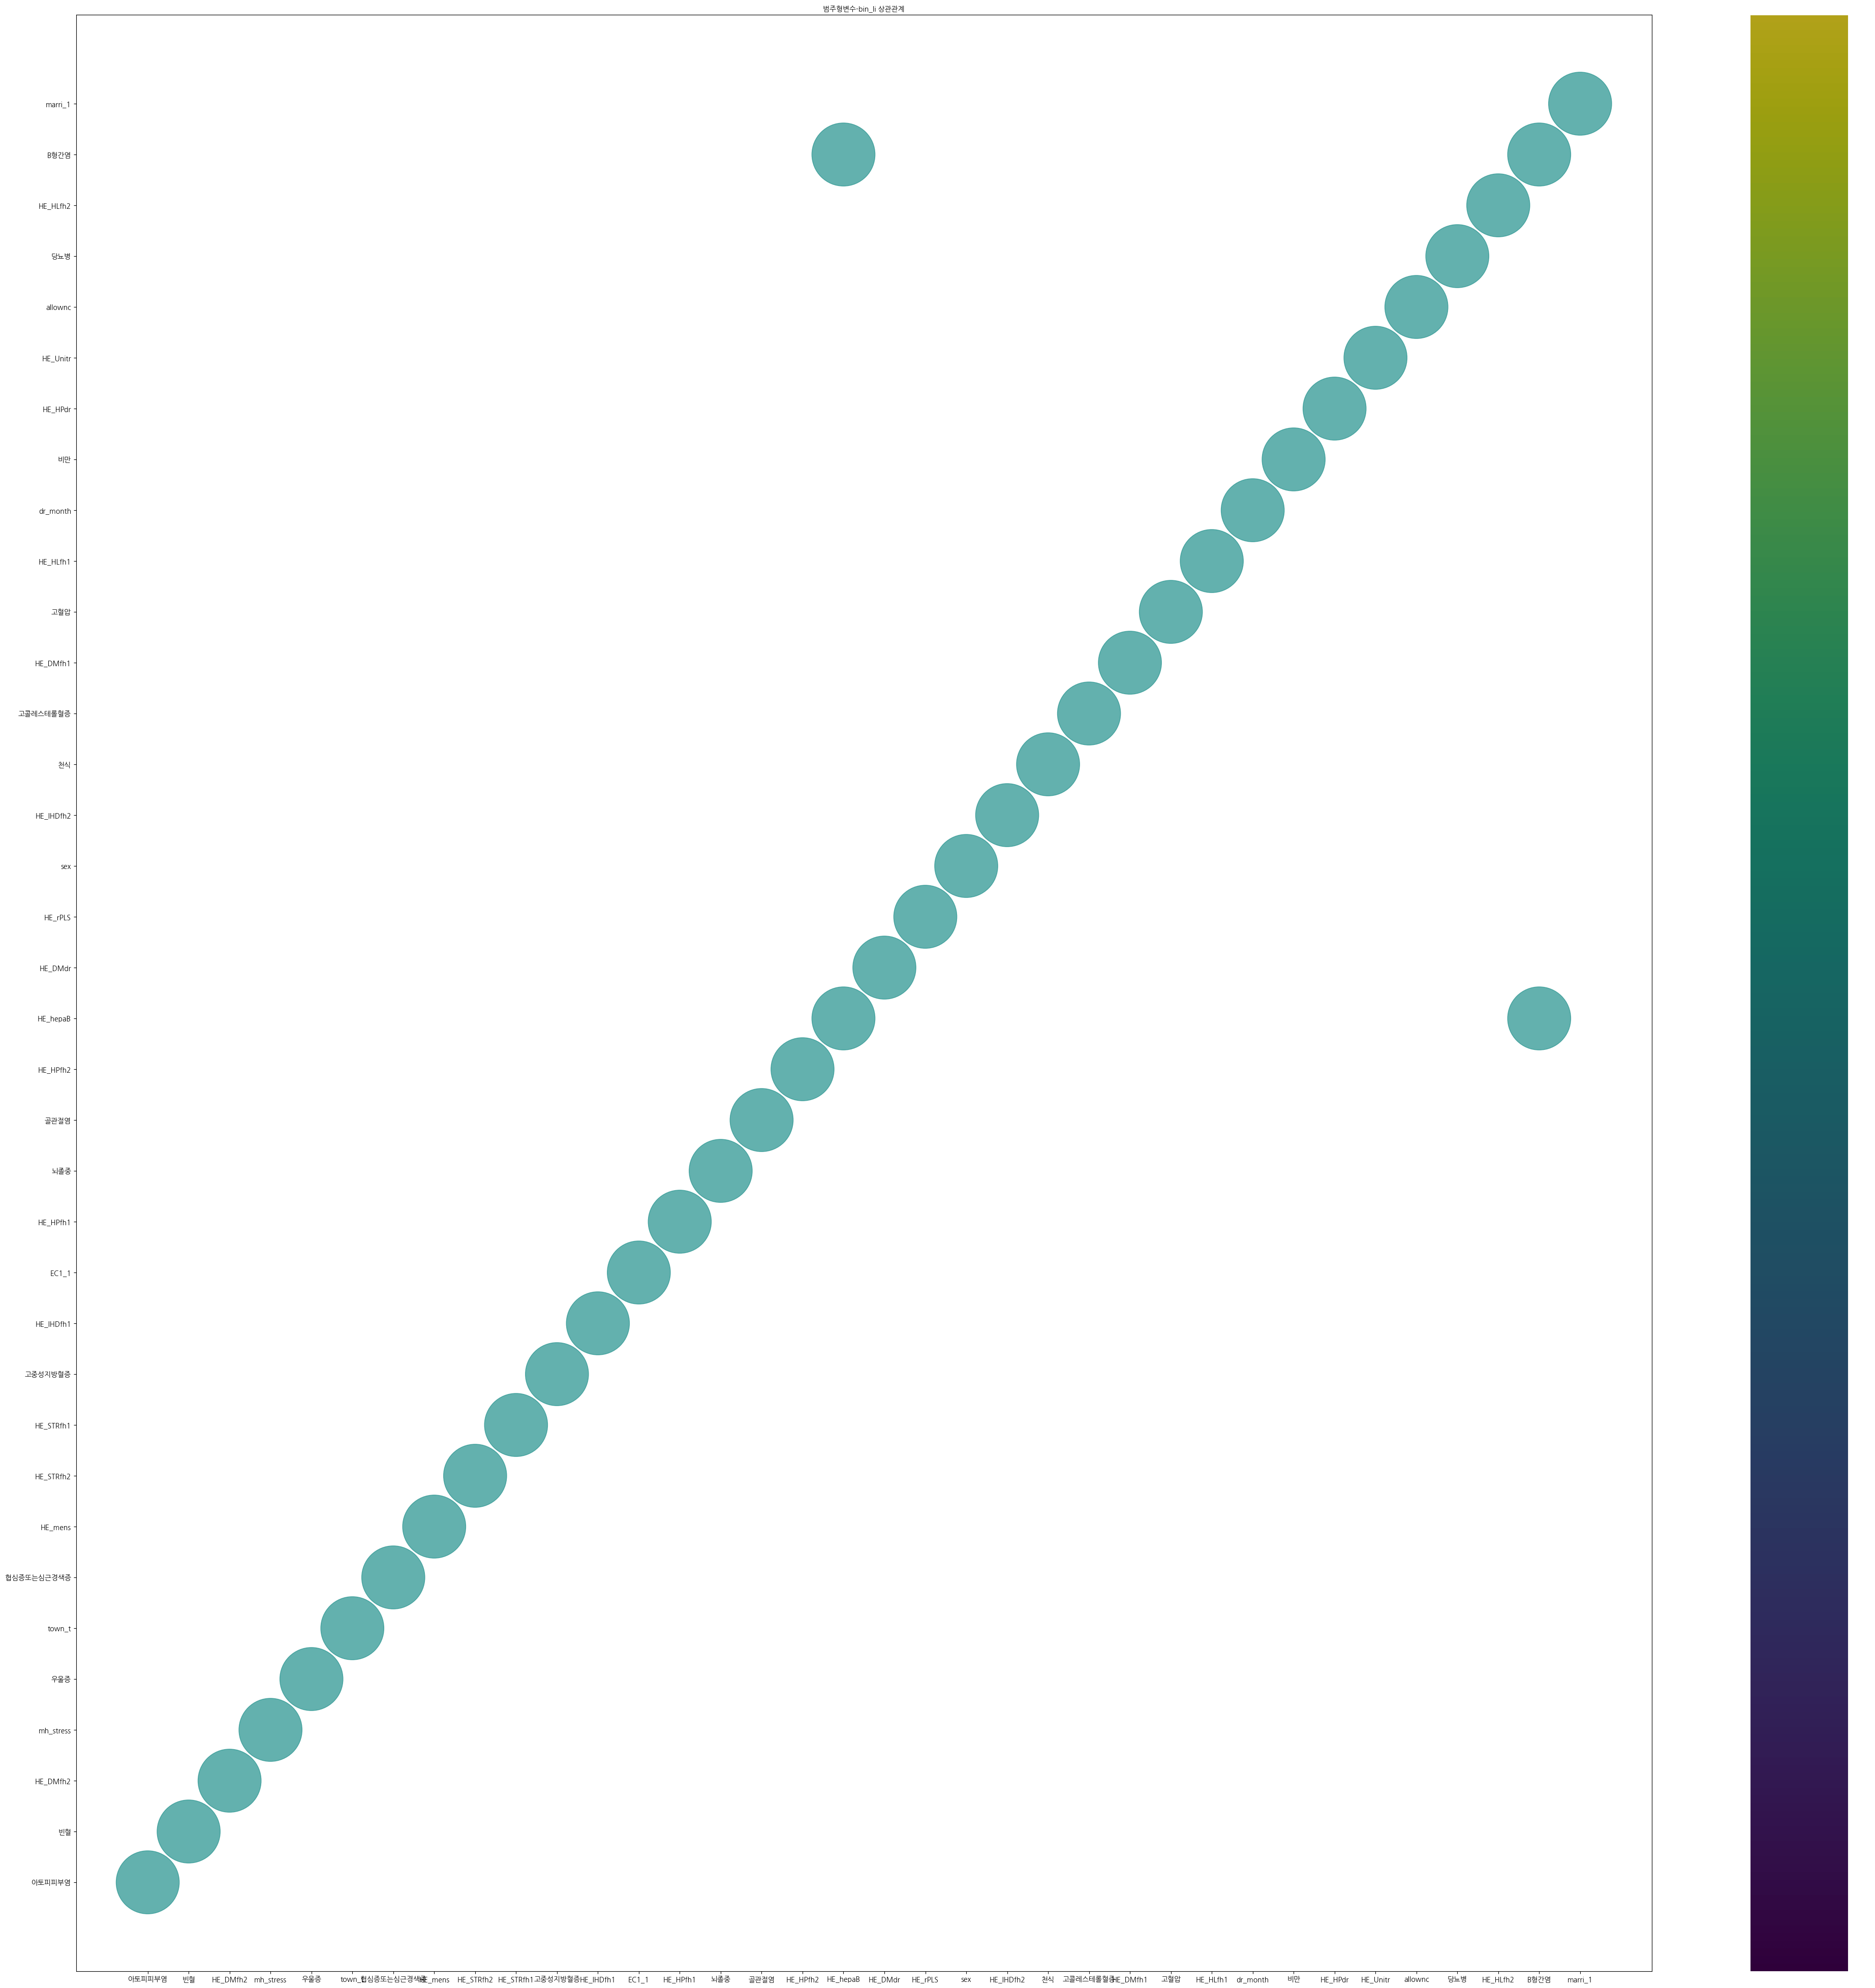

In [18]:
bin_corr = do_corr_analysis(df1, bin_col)

In [19]:
bin_ind = []
for ii in range(len(bin_corr)):
    if bin_corr.iloc[ii]['index'] != bin_corr.iloc[ii]['variable'] :
        bin_ind.append(ii)
bin_corr.iloc[bin_ind]

,index,variable,index_trans,variable_trans,index2values,variable2values,value
3,B형간염,HE_hepaB,B형간염,B형간염표면항원 양성여부(10세이상),34,17,1.0


독립관계가 아닌 종속관계에 있으니까 'HE_hepaB' 변수를 빼야한다. 

In [20]:
bin_col = list(set(bin_col) - set(['HE_hepaB']))

### 범주형에 대한 상관분석 시행

In [21]:
cat_minus_bin_li = list(set(cat_li) - set(bin_col))

C:\Users\jihoo\Anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\jihoo\Anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\jihoo\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


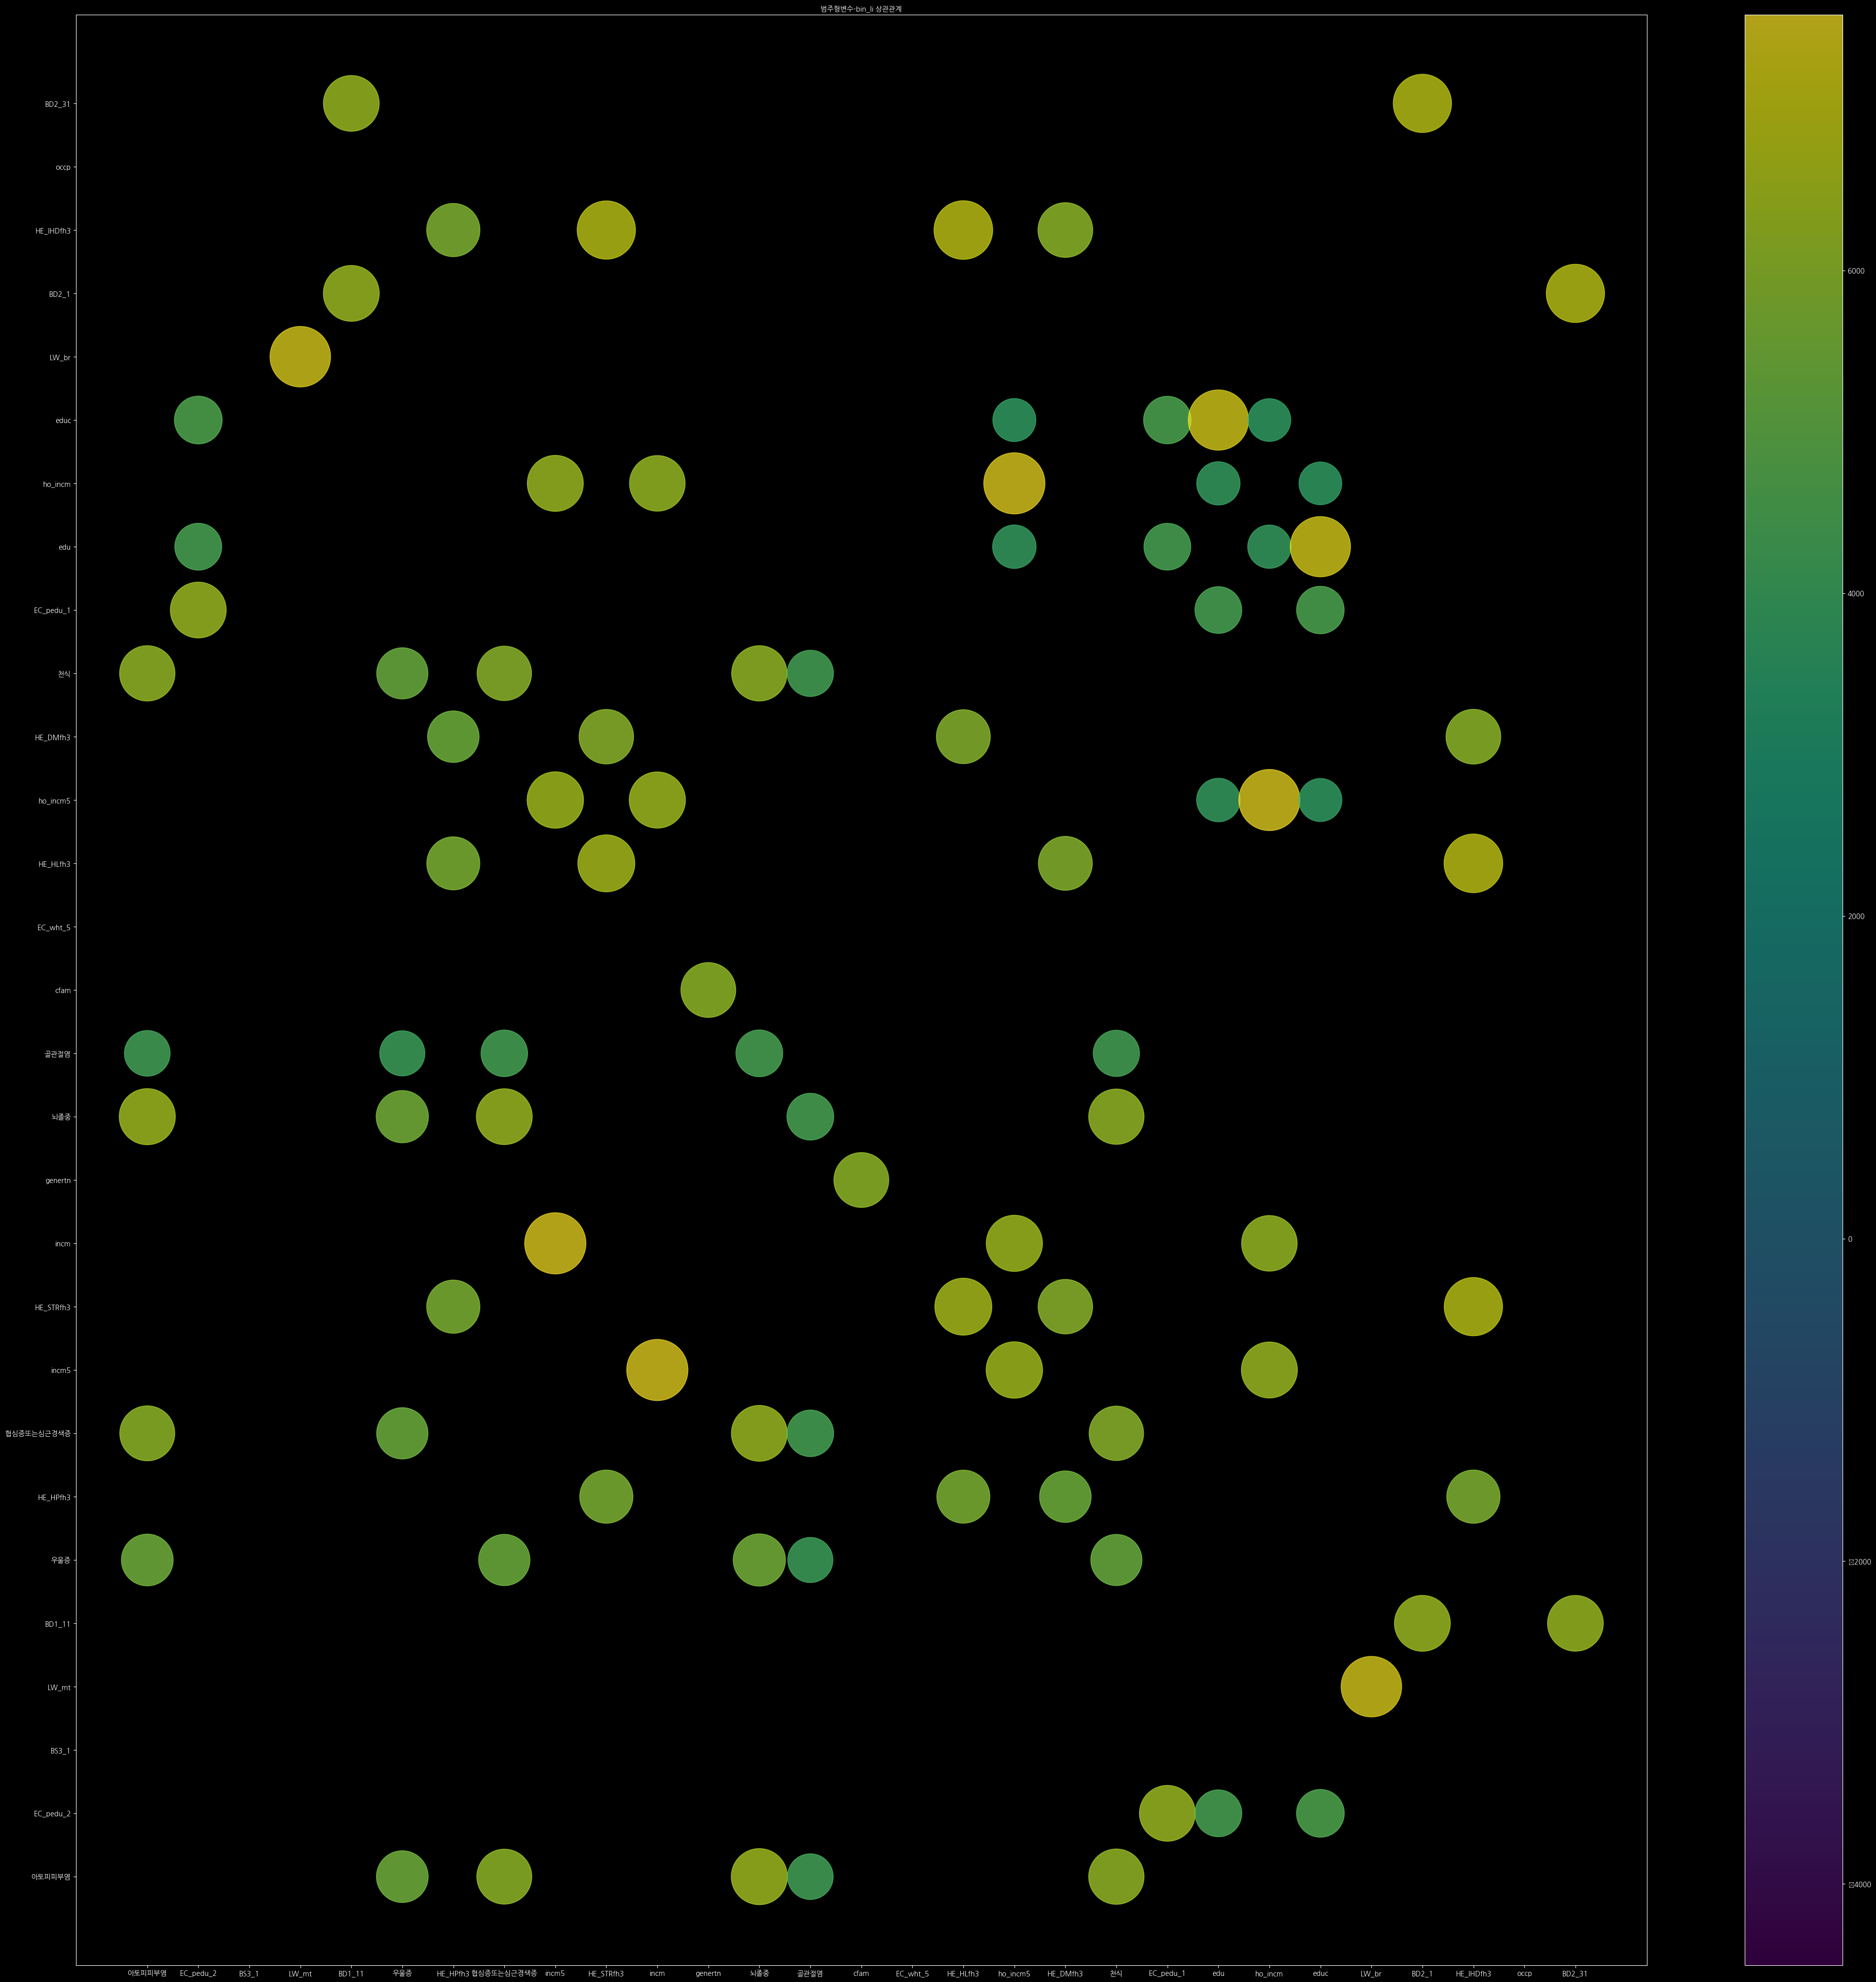

In [22]:
corr = do_corr_analysis(df_20to80 ,cat_minus_bin_li + target_li)

In [23]:
##FI가 높은 칼럼들 상관분석 시행
wosun_li = ['BD1_11', 'BD2_1', 'BS3_1', 'BP7', 'incm5', 'HE_Ubld', 'LW_br', 'HE_DMfh3', 'HE_HLfh3', 'HE_IHDfh3']

In [24]:
#index에 있는 칼럼들 기준으로 시행
include_ind = []
for ii in range(len(corr)):
    if corr.loc[ii, 'index'] in wosun_li : 
        include_ind.append(ii)
        
#variable에 있는 칼럼들 기준으로 시행
include_variable = []
for ii in range(len(corr)):
    if corr.loc[ii, 'variable'] in wosun_li:
        include_variable.append(ii)

print('include_ind : ', include_ind)
print('include_variable : ', include_variable)

include_ind :  [4, 7, 8, 11, 12, 21, 24, 27, 30, 49, 50]
include_variable :  [0, 2, 4, 5, 6, 12, 15, 21, 22, 24, 25, 46, 49]


## 이진형, 범주형 column에 대한 상관분석1

In [25]:
corr.iloc[include_ind]

,index,variable,index_trans,variable_trans,index2values,variable2values,value
4,HE_HLfh3,HE_IHDfh3,고지혈증 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),16,26,0.870832
7,HE_HLfh3,HE_STRfh3,고지혈증 의사진단 여부(형제자매),뇌졸중 의사진단 여부(형제자매),16,9,0.821643
8,incm5,ho_incm5,소득 5분위수(개인),소득 5분위수(가구),8,17,0.806367
11,incm5,ho_incm,소득 5분위수(개인),소득 4분위수(가구),8,22,0.794133
12,BD2_1,BD1_11,(만12세이상) 한 번에 마시는 음주량,(만12세이상) 1년간 음주빈도,25,4,0.790703
21,HE_DMfh3,HE_IHDfh3,당뇨병 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),18,26,0.758486
24,HE_DMfh3,HE_HLfh3,당뇨병 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),18,16,0.736230
27,HE_HLfh3,HE_HPfh3,고지혈증 의사진단 여부(형제자매),고혈압 의사진단 여부(형제자매),16,6,0.712400
30,HE_DMfh3,HE_HPfh3,당뇨병 의사진단 여부(형제자매),고혈압 의사진단 여부(형제자매),18,6,0.672480
49,BS3_1,LW_br,(성인) 현재 일반담배(궐련) 흡연 여부,모유수유 경험 여부,2,24,-0.537461


- 형제자매를 대상으로 성인병 의사진단 여부를 묻는 문항은 만성질환 의사진단 여부로 포함
- 음주량 관련 칼럼들 : 계수값이 차이가 나지 않고, 결측값이 가장 적은 '1년간 음주빈도'변수만 선택

## 이진형, 범주형 column에 대한 상관분석2

In [26]:
corr.iloc[include_variable]

,index,variable,index_trans,variable_trans,index2values,variable2values,value
0,incm,incm5,소득 4분위수(개인),소득 5분위수(개인),10,8,0.948330
2,LW_mt,LW_br,(만15세이상) 출산경험,모유수유 경험 여부,3,24,0.928125
4,HE_HLfh3,HE_IHDfh3,고지혈증 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),16,26,0.870832
5,HE_STRfh3,HE_IHDfh3,뇌졸중 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),9,26,0.860333
6,BD2_31,BD2_1,(만12세이상) 폭음 빈도,(만12세이상) 한 번에 마시는 음주량,28,25,0.859178
12,BD2_1,BD1_11,(만12세이상) 한 번에 마시는 음주량,(만12세이상) 1년간 음주빈도,25,4,0.790703
15,BD2_31,BD1_11,(만12세이상) 폭음 빈도,(만12세이상) 1년간 음주빈도,28,4,0.787558
21,HE_DMfh3,HE_IHDfh3,당뇨병 의사진단 여부(형제자매),허혈성심장질환 의사진단 여부(형제자매),18,26,0.758486
22,HE_STRfh3,HE_DMfh3,뇌졸중 의사진단 여부(형제자매),당뇨병 의사진단 여부(형제자매),9,18,0.752624
24,HE_DMfh3,HE_HLfh3,당뇨병 의사진단 여부(형제자매),고지혈증 의사진단 여부(형제자매),18,16,0.736230


- 소득분위 관련 변수 : 'incm5'칼럼만 선택
- '출산경험'과 ''모유수유 경험여부' 칼럼 중 유의미한 '모유수유 경험여부'칼럼만 선택

# Control Features

1. 형제자매 만성질환 의사진단 여부 칼럼 추가
2. 형제자매 만성질환 의사진단 여부 외 관련 칼럼 제거
3. 'LW_mt'(출산경험) 삭제
4. 소득 관련 칼럼 : 'incm5'외 제외
5. 음주 관련 칼럼 : 'BD1_11'외 제외

## 1. 형제자매 만성질환 의사진단 여부 칼럼 추가

In [6]:
brother_sister_li = []

for col in df_20to80.columns:
    if 'fh3' in col :
        brother_sister_li.append(col)
        
for i in brother_sister_li :
    df_20to80[i] = np.where(df_20to80[i] == 1, 1, 0)

df_20to80['bro_sis_existence'] = np.where(df_20to80[brother_sister_li].sum(axis=1) > 0, 1, 0)

In [7]:
brother_sister_li

['HE_HLfh3', 'HE_HPfh3', 'HE_STRfh3', 'HE_IHDfh3', 'HE_DMfh3']

## 2. 형제자매 만성질환 의사진단 여부 외 관련 칼럼 제거

In [28]:
df_20to80.drop(brother_sister_li, axis=1, inplace=True)
df_20to80

,BE3_31,EC_pedu_2,BS3_1,region,LW_mt,HE_Uro,BD1_11,marri_2,incm5,incm,...,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증,Target,bro_sis_existence
0,8.0,3.0,3.0,1.0,-1.0,0.0,6.0,1.0,4.0,3.0,...,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,1,0
1,8.0,-2.0,-1.0,1.0,1.0,0.0,4.0,1.0,2.0,2.0,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,1
2,8.0,3.0,-1.0,1.0,1.0,0.0,-1.0,1.0,4.0,3.0,...,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1,0
3,2.0,5.0,1.0,1.0,-1.0,0.0,6.0,8.0,2.0,2.0,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1,0
4,8.0,1.0,-1.0,1.0,1.0,0.0,3.0,3.0,5.0,4.0,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39425,6.0,5.0,-1.0,8.0,-1.0,0.0,2.0,-1.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
39426,3.0,8.0,-1.0,8.0,-1.0,0.0,3.0,1.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
39427,5.0,7.0,-1.0,8.0,-1.0,0.0,3.0,1.0,4.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
39428,3.0,5.0,-1.0,8.0,-1.0,0.0,2.0,-1.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


## 3. 'LW_mt'(출산경험) 삭제

In [29]:
df_20to80.drop(['LW_mt'], axis=1, inplace=True)

## 4. 소득 관련 칼럼 : 'incm5'외 제외

In [30]:
incm_li = []

for col in df_20to80.columns:
    if 'incm' in col :
        incm_li.append(col)
incm_li

['incm5', 'incm', 'ho_incm5', 'ho_incm']

In [31]:
df_20to80.drop(['incm', 'ho_incm', 'ho_incm5'], axis=1, inplace=True)

## 5. 음주 관련 칼럼 : 'BD1_11'외 제외

In [32]:
BD_li = []

for col in df_20to80.columns:
    if 'BD' in col :
        BD_li.append(col)
BD_li

['BD1_11', 'BD2_1', 'BD2_31']

In [33]:
df_20to80.drop(['BD2_1', 'BD2_31'], axis=1, inplace=True)

In [34]:
df_20to80

,BE3_31,EC_pedu_2,BS3_1,region,HE_Uro,BD1_11,marri_2,incm5,fam_rela,genertn,...,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증,Target,bro_sis_existence
0,8.0,3.0,3.0,1.0,0.0,6.0,1.0,4.0,1.0,2.0,...,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,1,0
1,8.0,-2.0,-1.0,1.0,0.0,4.0,1.0,2.0,2.0,2.0,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,1
2,8.0,3.0,-1.0,1.0,0.0,-1.0,1.0,4.0,6.0,5.0,...,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1,0
3,2.0,5.0,1.0,1.0,0.0,6.0,8.0,2.0,1.0,5.0,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1,0
4,8.0,1.0,-1.0,1.0,0.0,3.0,3.0,5.0,1.0,1.0,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39425,6.0,5.0,-1.0,8.0,0.0,2.0,-1.0,4.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
39426,3.0,8.0,-1.0,8.0,0.0,3.0,1.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
39427,5.0,7.0,-1.0,8.0,0.0,3.0,1.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0
39428,3.0,5.0,-1.0,8.0,0.0,2.0,-1.0,5.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


=========================================================================================================